In [2]:
# this notebook reads and prints the boston prediction images


import numpy as np
import pandas as pd

base_cwd = "/home/azureuser/cloudfiles/code/Users/tingyan.deng"
loc = "boston"
train_loc = base_cwd[:base_cwd.rfind("/")] + "/gsv-ml-buildings-new/datasets/"+loc+"/train.csv"
#val_loc  = base_cwd[:base_cwd.rfind("/")] + "/gsv-ml-buildings-new/datasets/"+loc+"/val.csv" 
cmp_loc   = base_cwd + "/"+loc+"/cmp.csv"
ts_loc    = base_cwd + "/"+loc+"/trueskill.csv"
img_loc   = base_cwd[:base_cwd.rfind("/")] + "/gsv-ml-buildings-new/datasets/"+loc+"/imgs"
print(train_loc, cmp_loc, ts_loc)

/home/azureuser/cloudfiles/code/Users/gsv-ml-buildings-new/datasets/boston/train.csv /home/azureuser/cloudfiles/code/Users/tingyan.deng/boston/cmp.csv /home/azureuser/cloudfiles/code/Users/tingyan.deng/boston/trueskill.csv


In [3]:
# function to read the data

def read_data(train_loc, cmp_loc, ts_loc):
    train = pd.read_csv(train_loc)
    ts = pd.read_csv(ts_loc)
    df = pd.merge(train, ts, how="left", on="image_name")
    df = df.sort_values(by="score_x", ascending=False).reset_index(drop=True)
    #print(df)
    print("last index: ", [str(i)+": "+str(df.where(df['trueskill_category']==i).last_valid_index()) for i in range(4)])
    print(df.iloc[len(df)-1]['score_x'], df.iloc[0]['score_x'])
    return(df)

In [4]:
# function for plotting

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
def plot_row(imgs, scores, classes):
    imgs = [mpimg.imread(img_loc+"/"+img) for img in imgs]
    _, axs = plt.subplots(1, len(imgs), figsize=(30,30))
    for img, ax, score, curr_class in zip(imgs, axs, scores, classes):
        ax.imshow(img)
        curr_title = str(curr_class)+": "+str(round(score, 2))
        ax.set_title(curr_title, fontsize=20)
        ax.axis('off')
    plt.show()


last index:  ['0: 2', '1: 50', '2: 2590', '3: 2963']
16.95555148419374 34.56575363106577


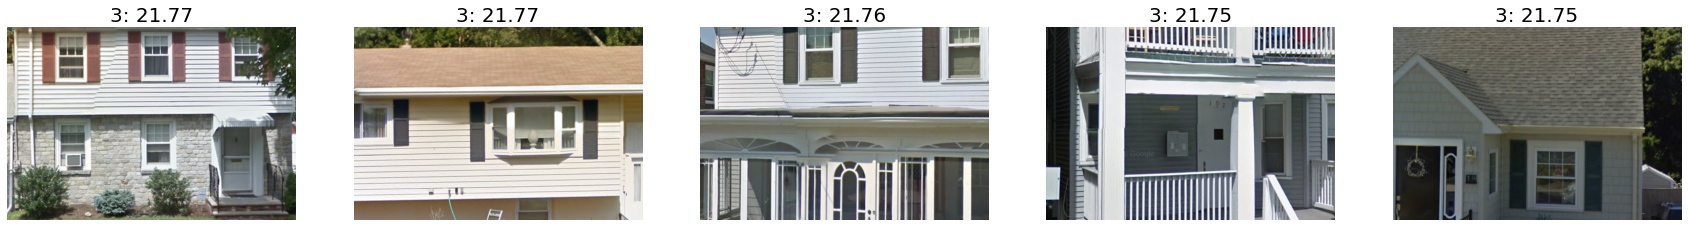

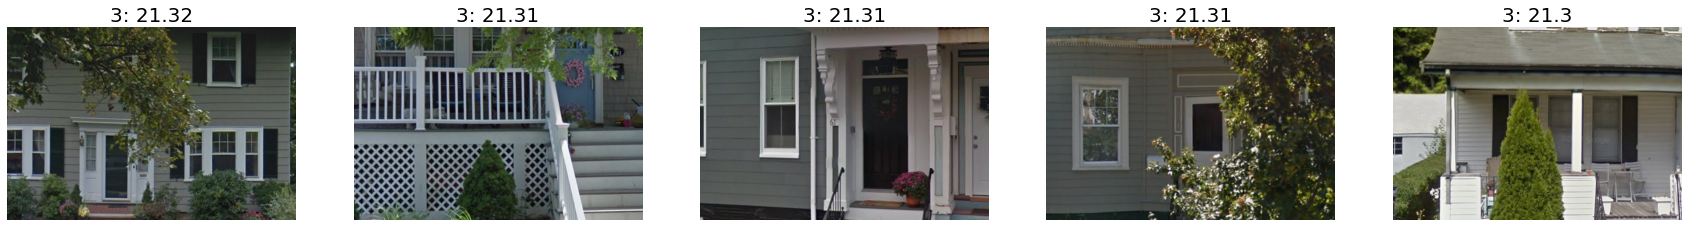

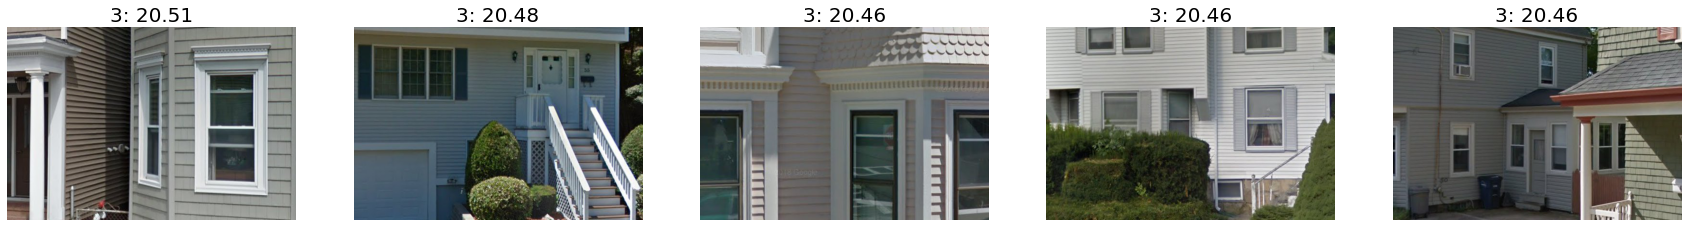

In [11]:
# function to execuate
# can change idx:idx+x for showing x images in a row
# can chage idx+= to iterate through the dataset

df = read_data(train_loc, cmp_loc, ts_loc)

idx = 2700
while (idx < len(df)):
    df_slice = df.iloc[idx:idx+5]
    plot_row(df_slice['image_name'].tolist(), df_slice['score_x'].tolist(), df_slice['trueskill_category'].tolist())
    #idx+=50
    idx+=100
    #idx+=1000
    